In [1]:
import pandas as pd
import joblib

# Load scored test data
test_df = pd.read_csv(r"E:\Projects Data Scientist\credit-risk-project\data\processed\test_scored.csv")

y_test = test_df["actual_default"]
y_test_pd = test_df["pd"]

Test AUC: 0.833


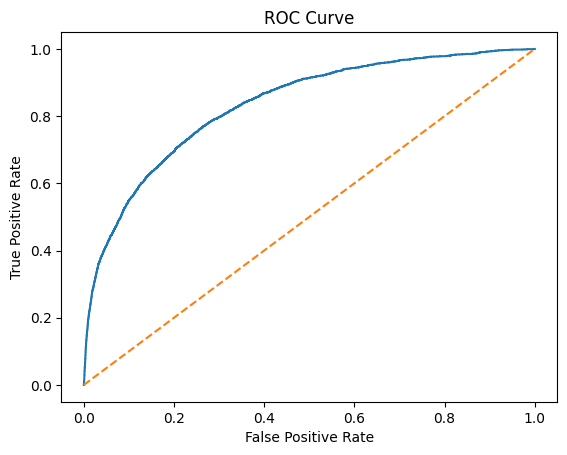

In [2]:
# ROC Curve & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_test_pd)
print(f"Test AUC: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_test_pd)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [3]:
# KS Statistic
import numpy as np
import pandas as pd

ks_df = pd.DataFrame({
    "pd": y_test_pd,
    "target": y_test
}).sort_values("pd")

ks_df["cum_bad"] = ks_df["target"].cumsum() / ks_df["target"].sum()
ks_df["cum_good"] = (
    (1 - ks_df["target"]).cumsum() /
    (1 - ks_df["target"]).sum()
)

ks_df["ks"] = np.abs(ks_df["cum_bad"] - ks_df["cum_good"])
ks_stat = ks_df["ks"].max()

print(f"KS Statistic: {ks_stat:.3f}")

KS Statistic: 0.505


In [5]:
# Train vs Test Comparison
train_df = pd.read_csv(r"E:\Projects Data Scientist\credit-risk-project\data\processed\train_scored.csv")
y_train = train_df["actual_default"]
y_train_pd = train_df["pd"]
train_auc = roc_auc_score(y_train, y_train_pd)
test_auc = roc_auc_score(y_test, y_test_pd)

print(f"Train AUC: {train_auc:.3f}")
print(f"Test AUC: {test_auc:.3f}")

Train AUC: 0.832
Test AUC: 0.833


In [6]:
# Decile Analysis
ks_df["decile"] = pd.qcut(ks_df["pd"], 10, labels=False)

decile_summary = ks_df.groupby("decile").agg(
    default_rate=("target", "mean"),
    count=("target", "size")
).reset_index()

decile_summary

,decile,default_rate,count
0,0,0.005333,4500
1,1,0.009556,4500
2,2,0.011333,4500
3,3,0.014667,4500
4,4,0.023333,4500
5,5,0.037778,4500
6,6,0.051111,4500
7,7,0.077778,4500
8,8,0.119556,4500
9,9,0.318000,4500
